In [ ]:
#Forecasted values (blue line) extend into the future based on the model's predictions, and the historical data points (black dots) show the actual sales that occurred in the past.


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnjcayhfg/cqj10sp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnjcayhfg/geosvuq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18113', 'data', 'file=/tmp/tmpnjcayhfg/cqj10sp7.json', 'init=/tmp/tmpnjcayhfg/geosvuq4.json', 'output', 'file=/tmp/tmpnjcayhfg/prophet_modell2s0zqjp/prophet_model-20230725024141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnj

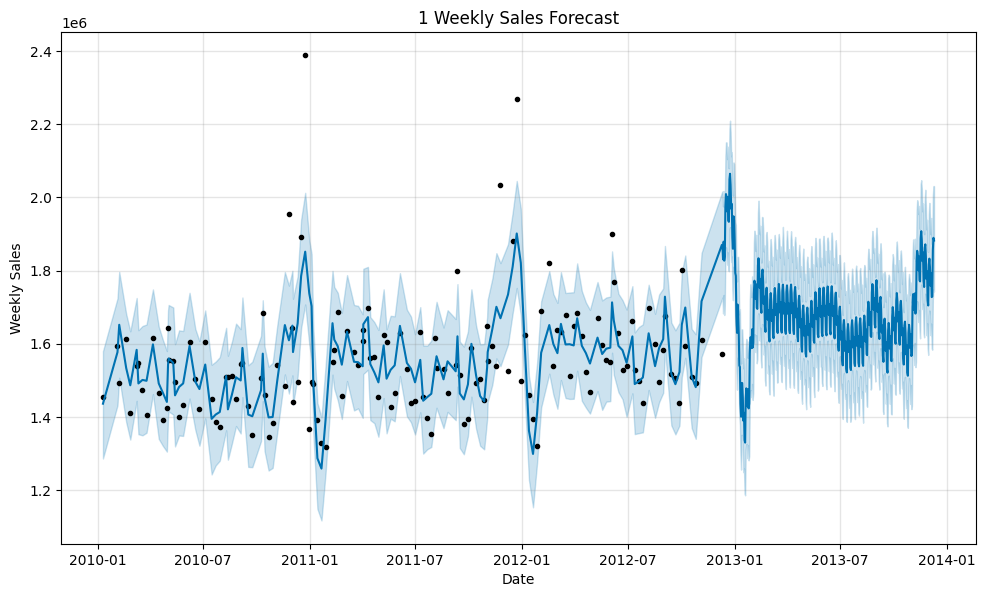

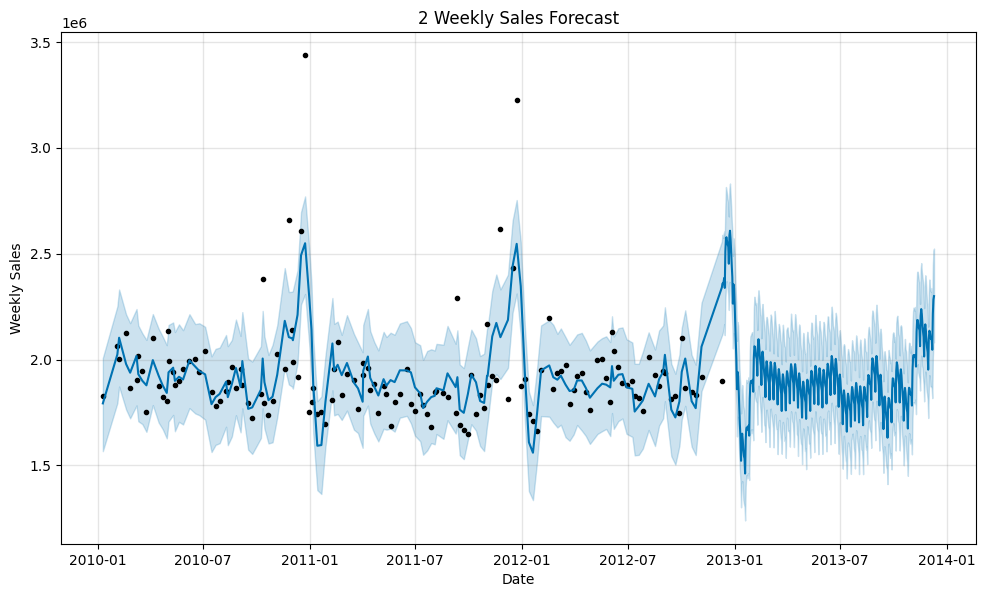

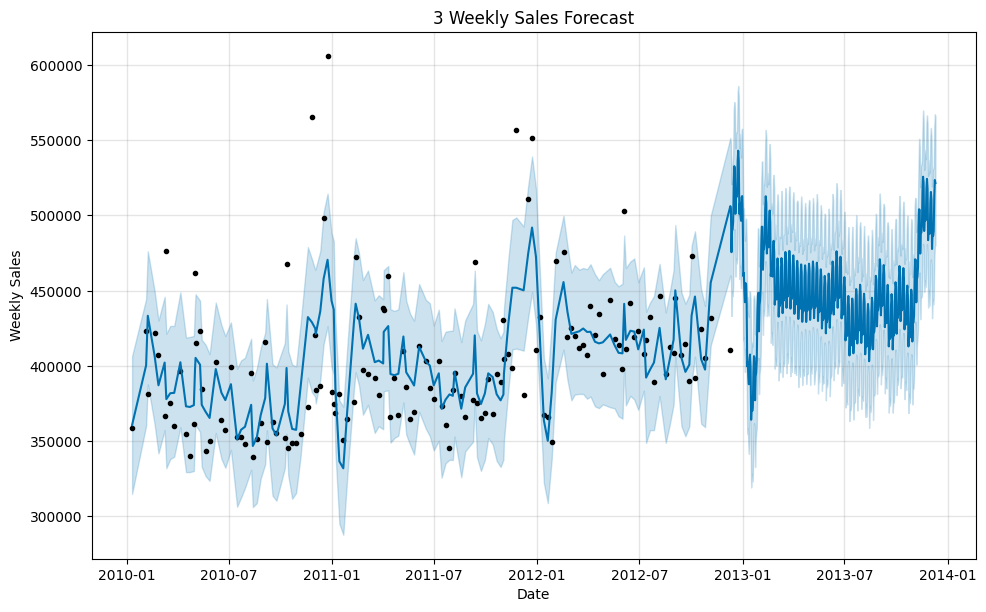

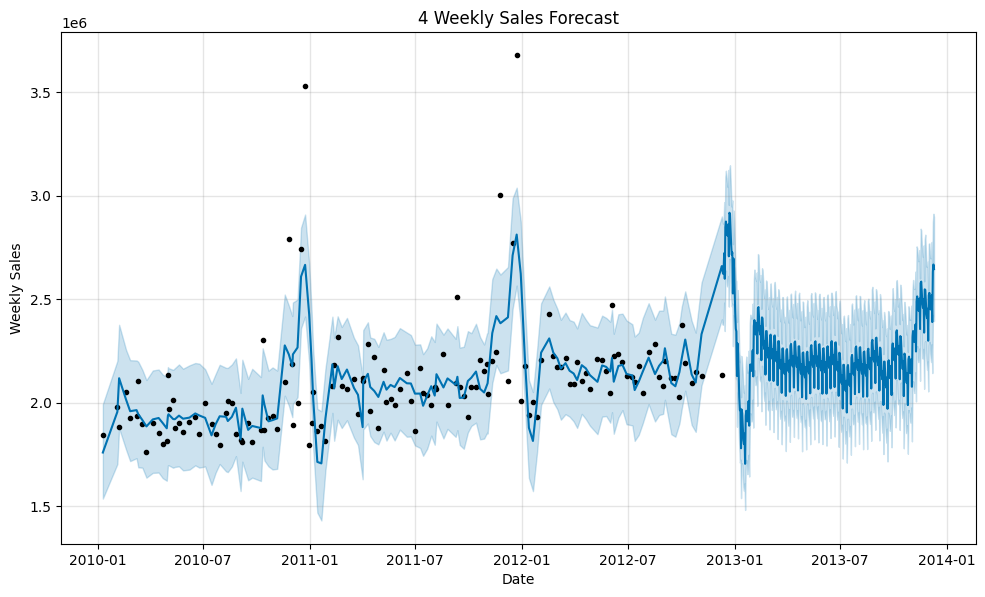

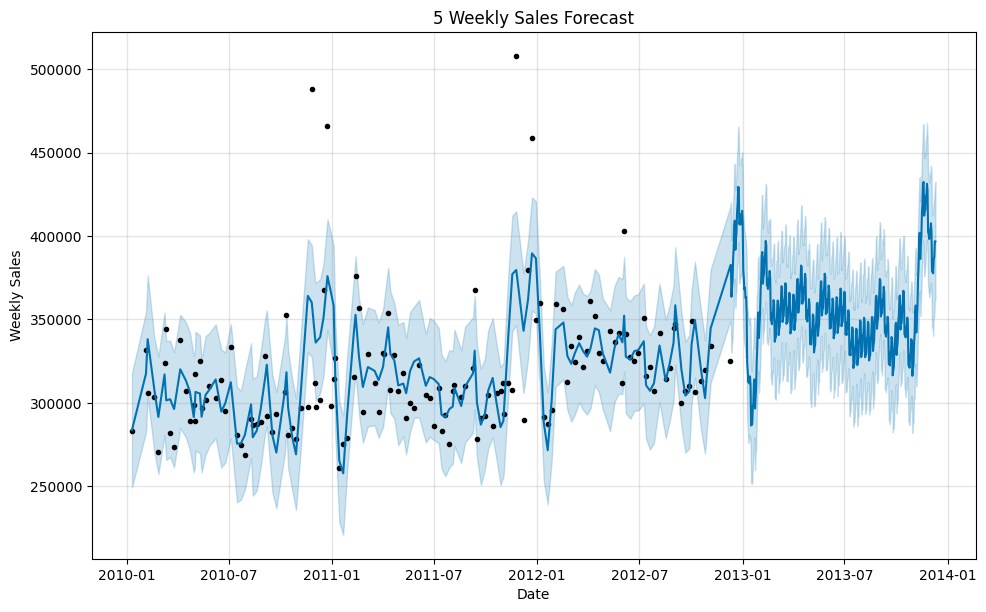

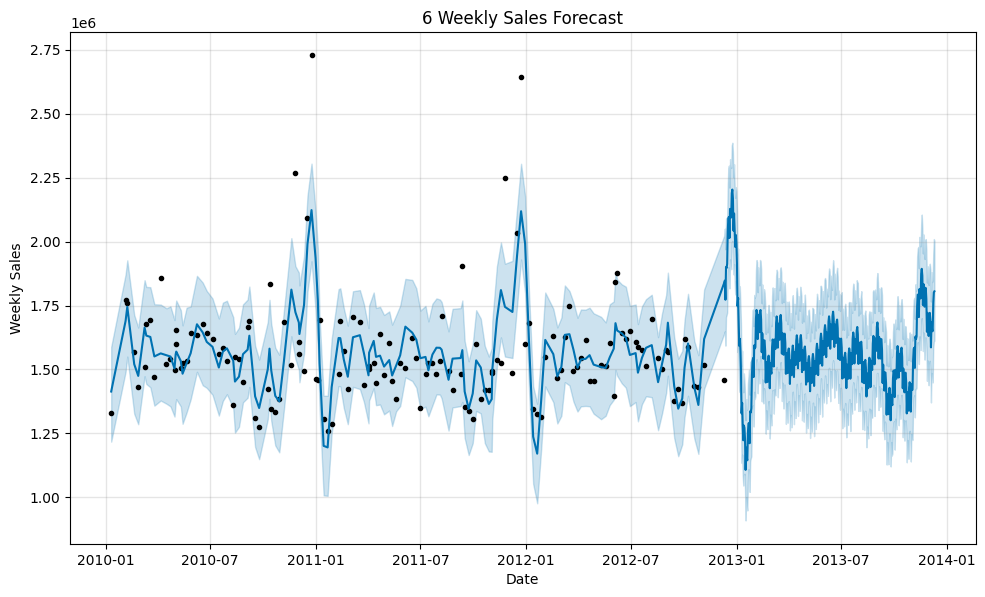

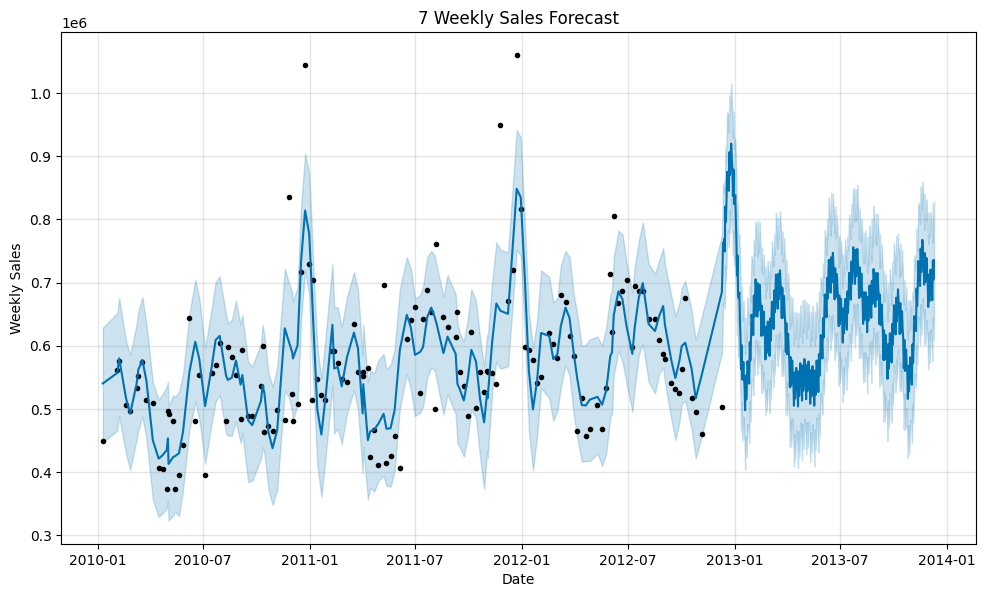

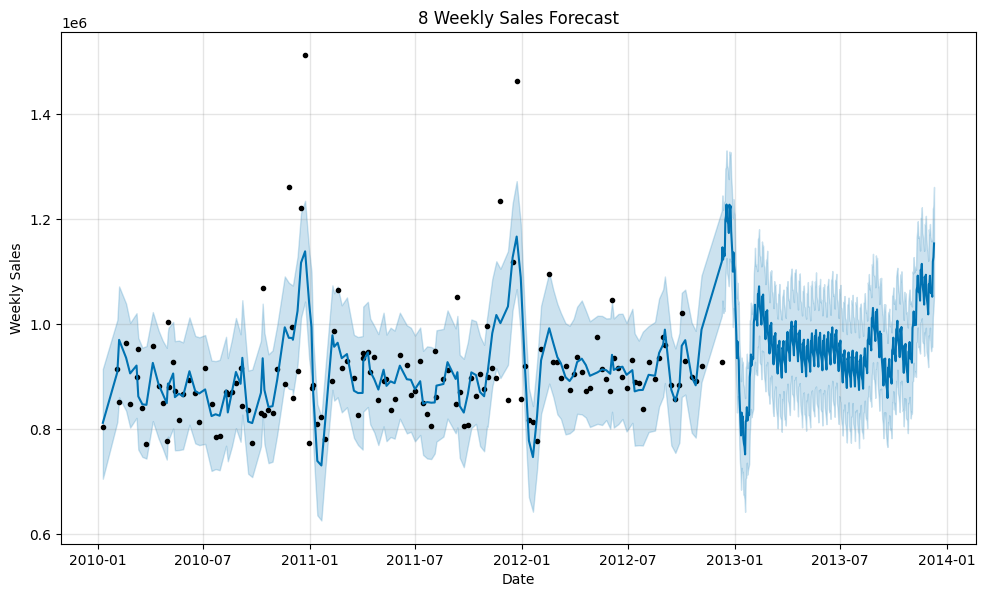

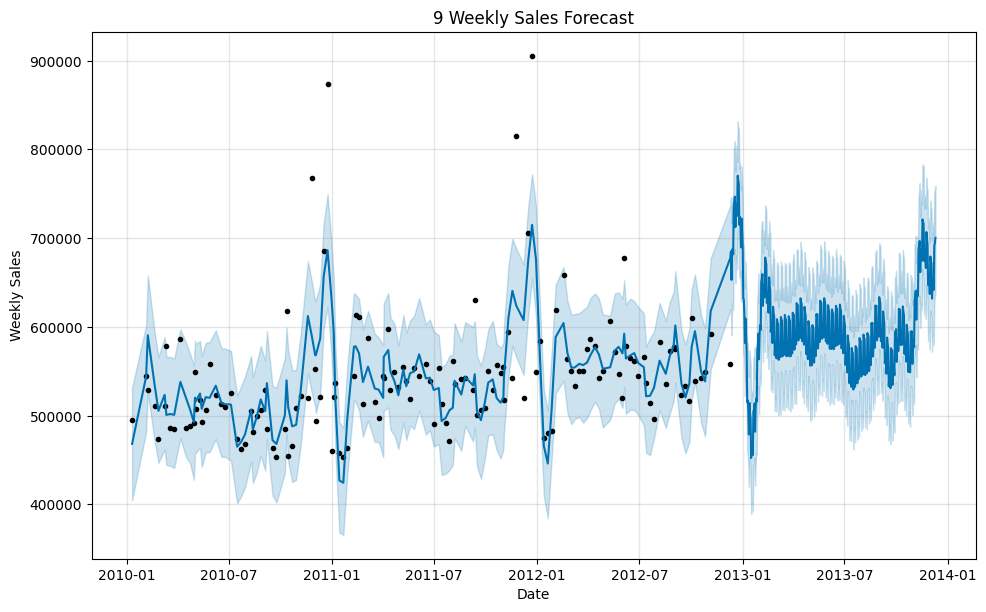

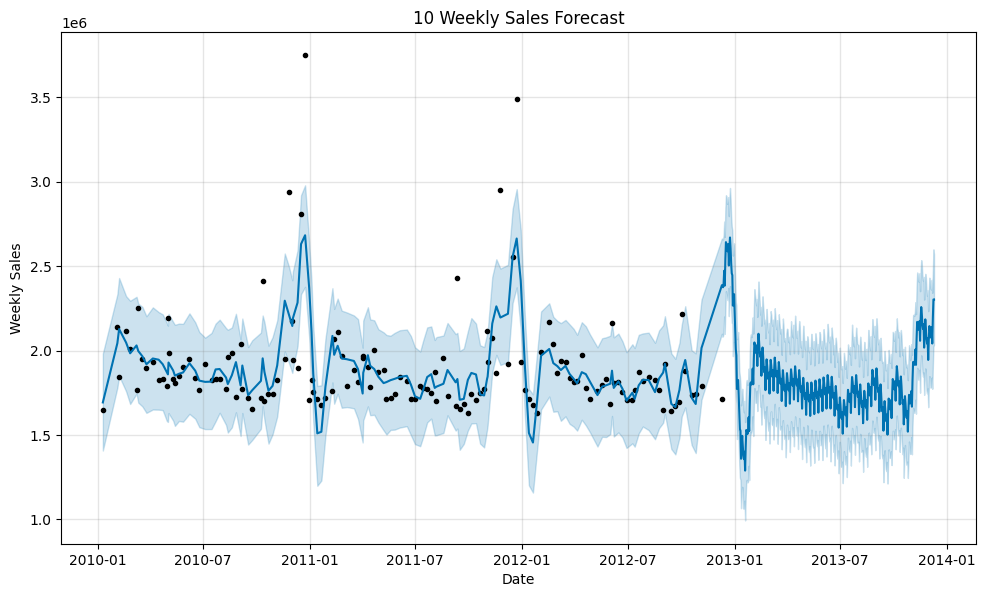

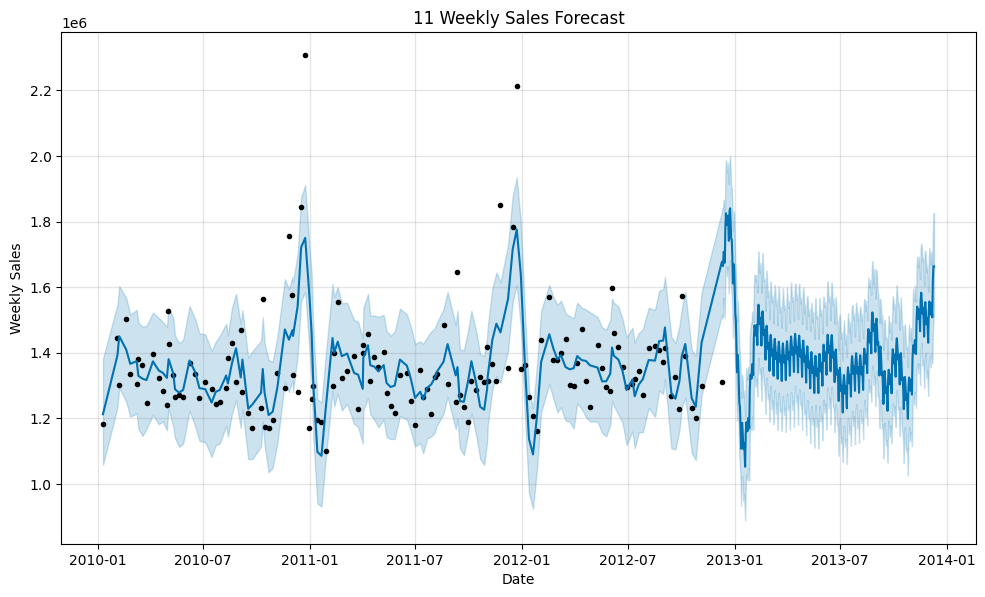

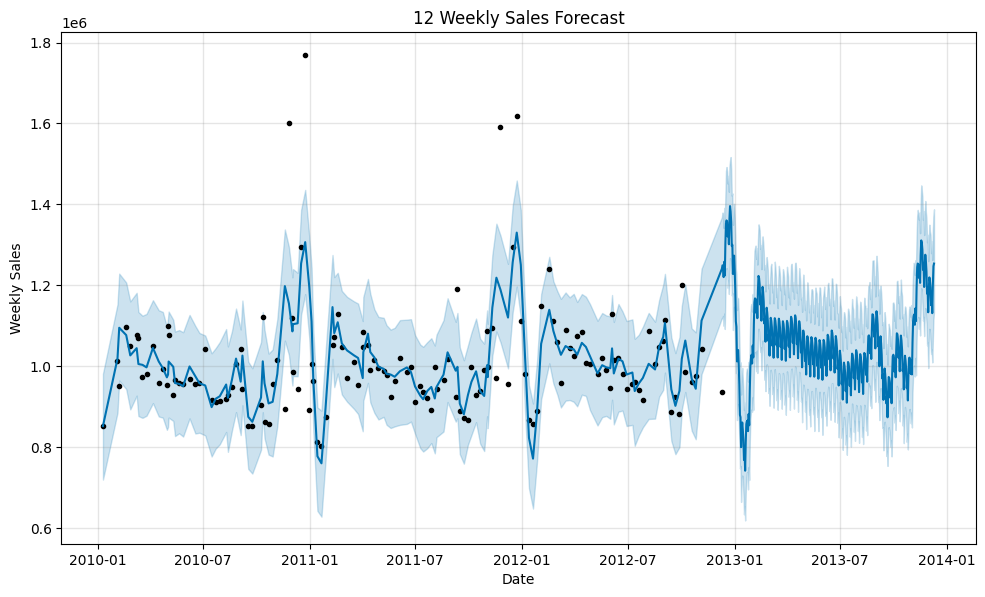

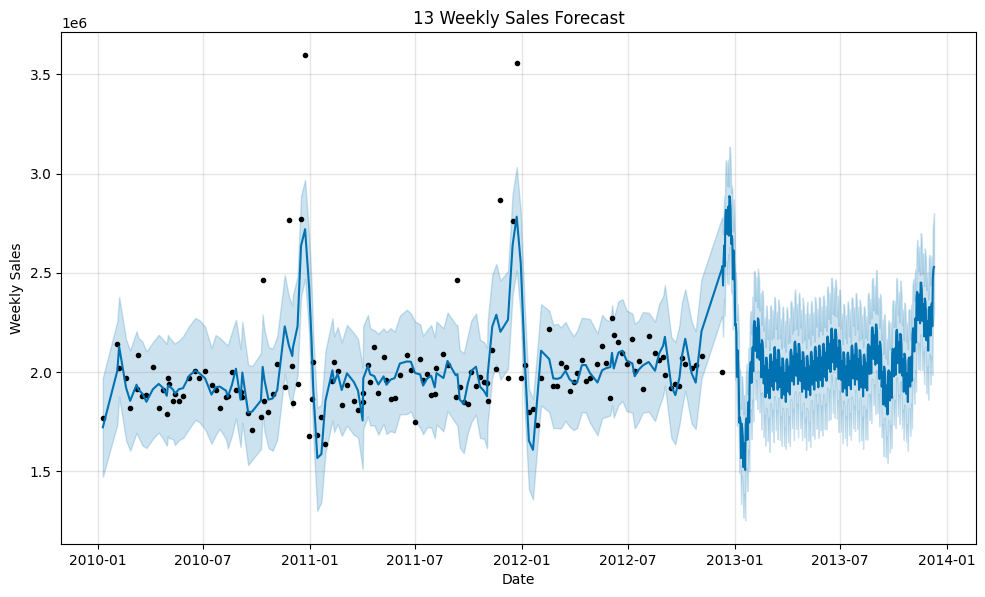

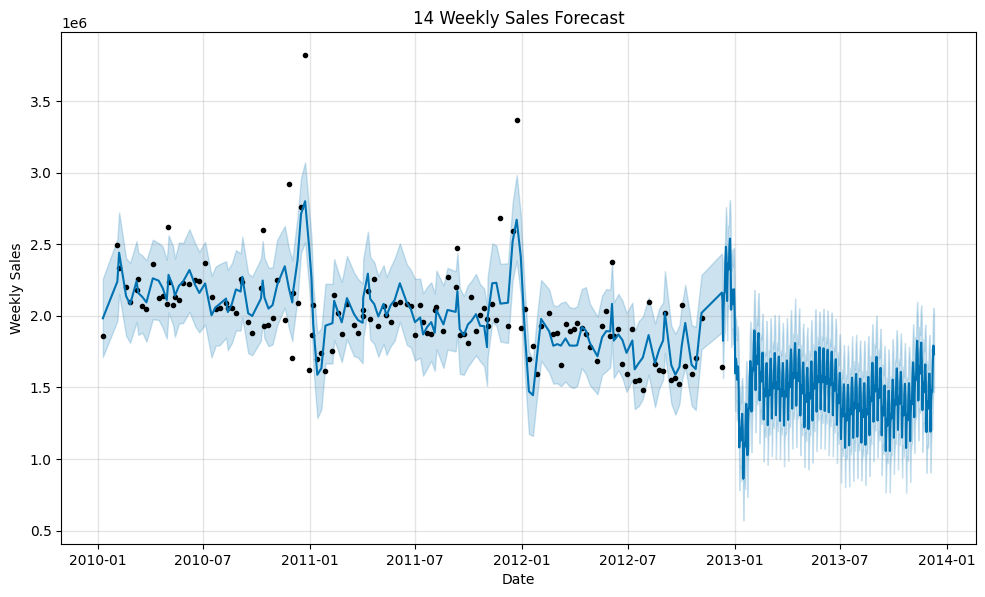

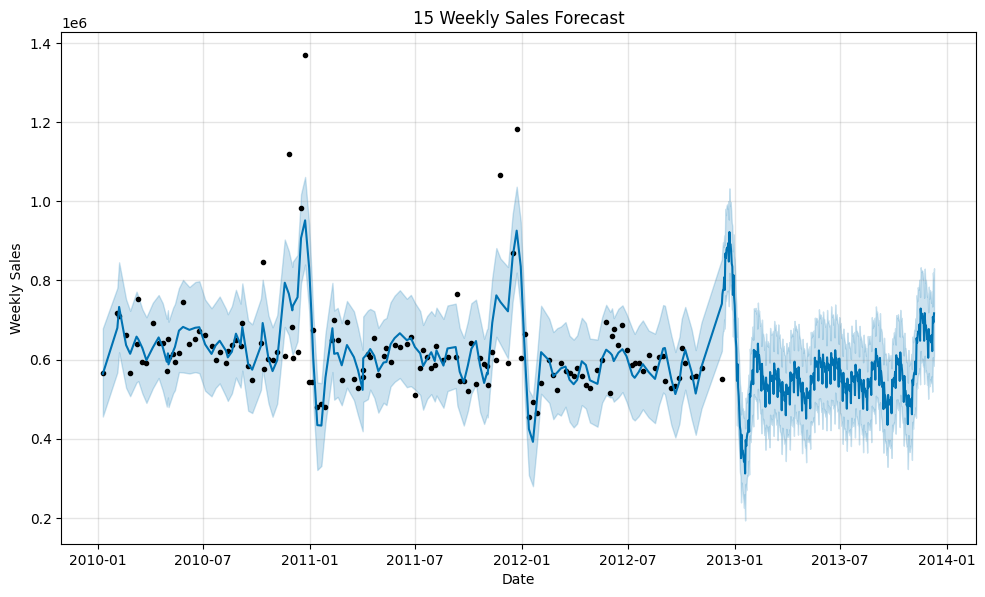

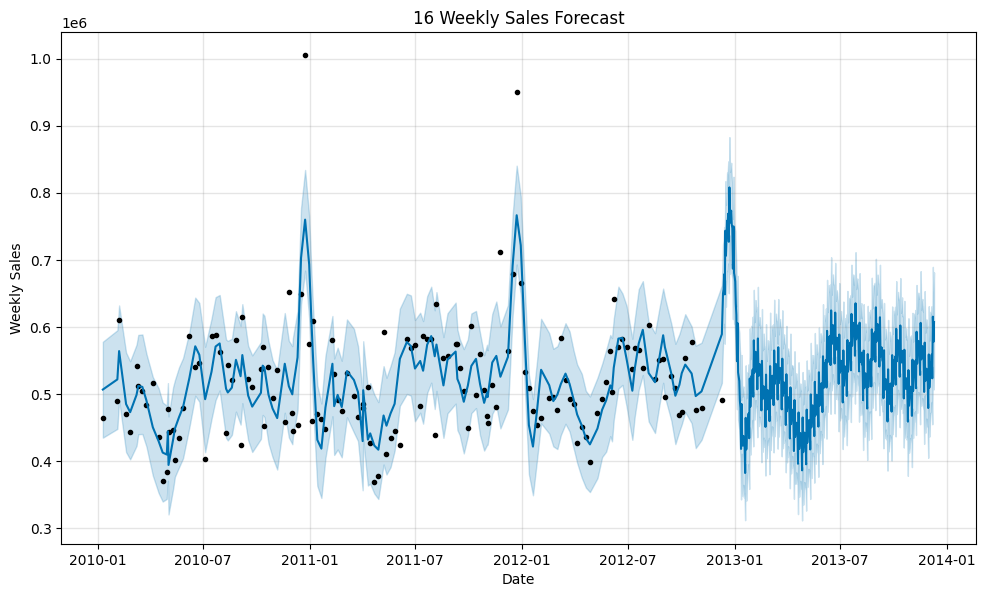

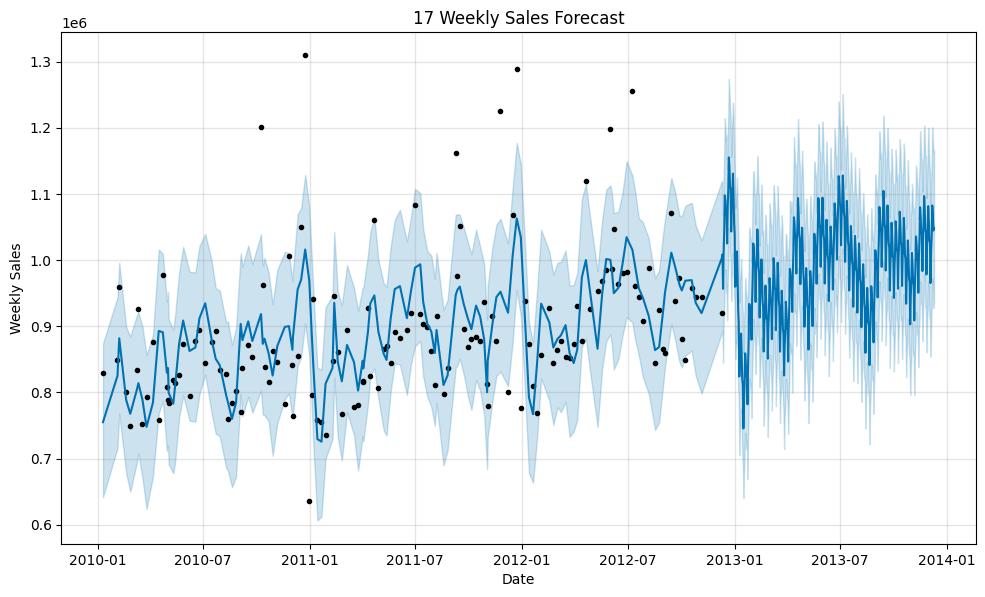

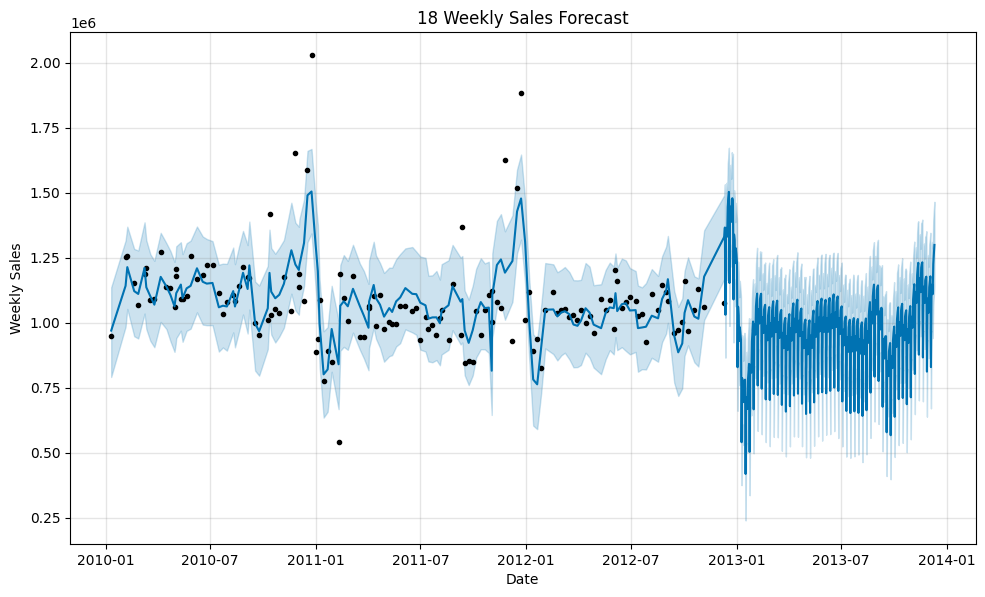

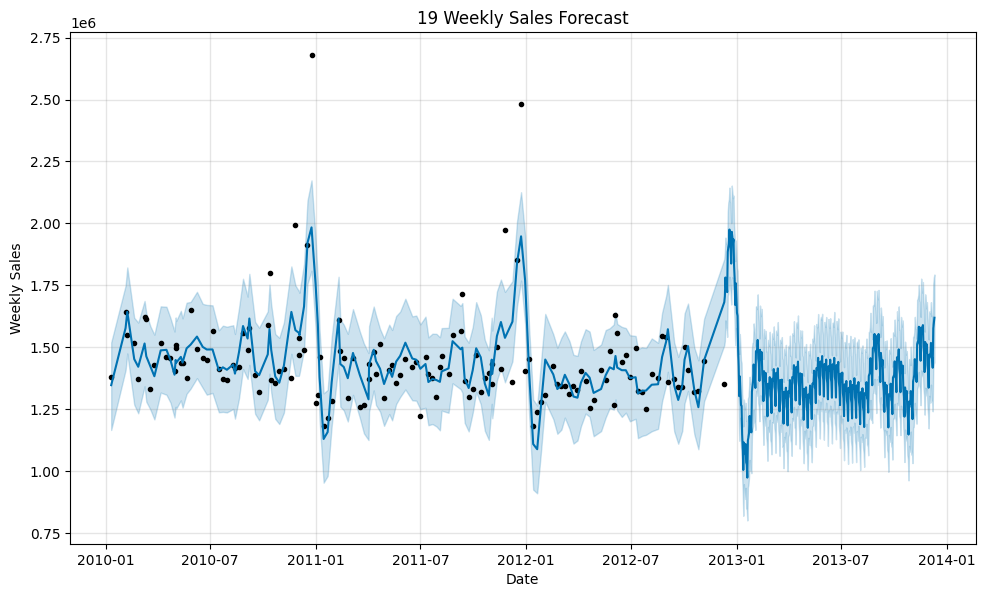

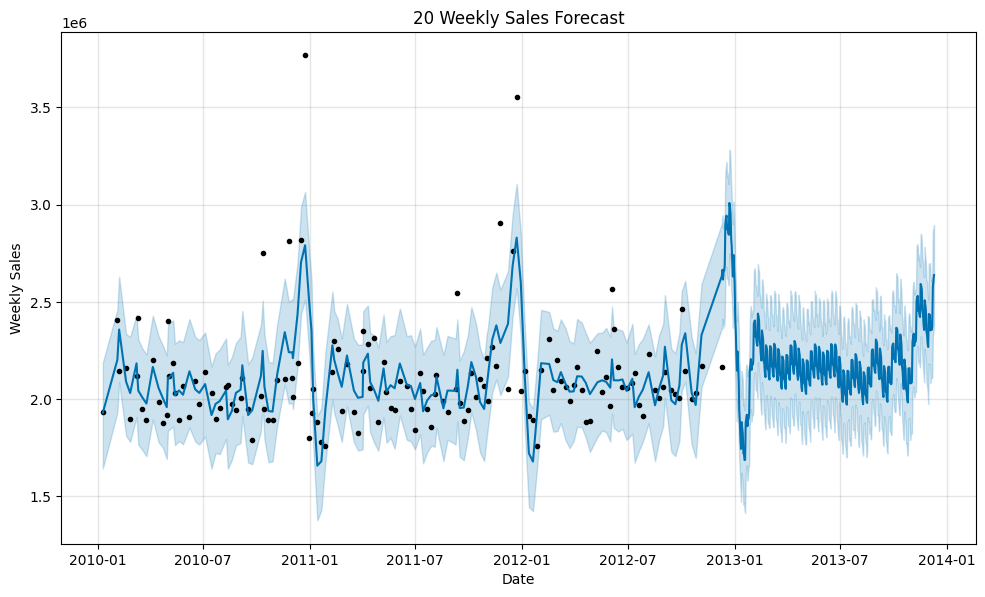

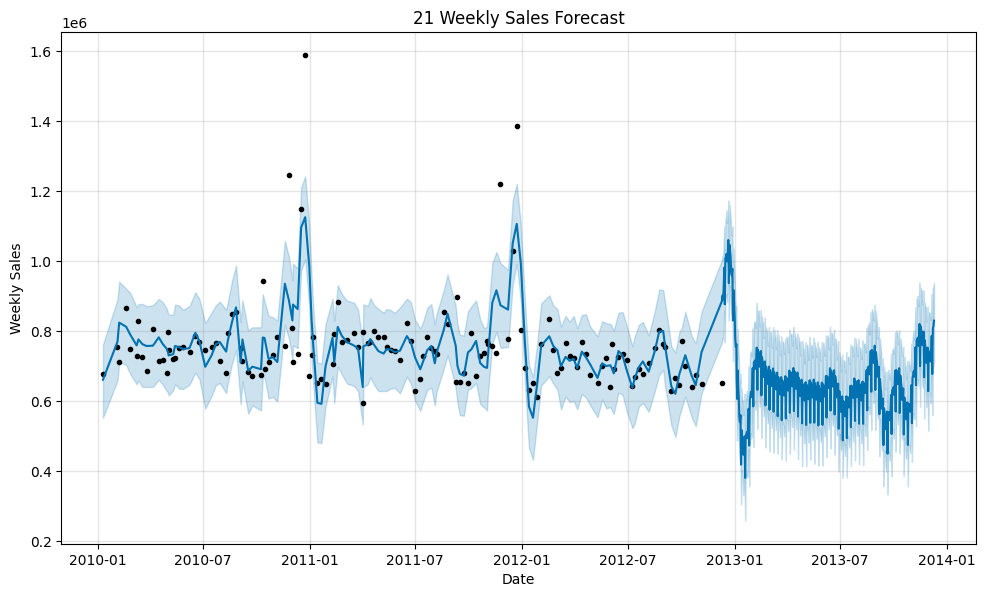

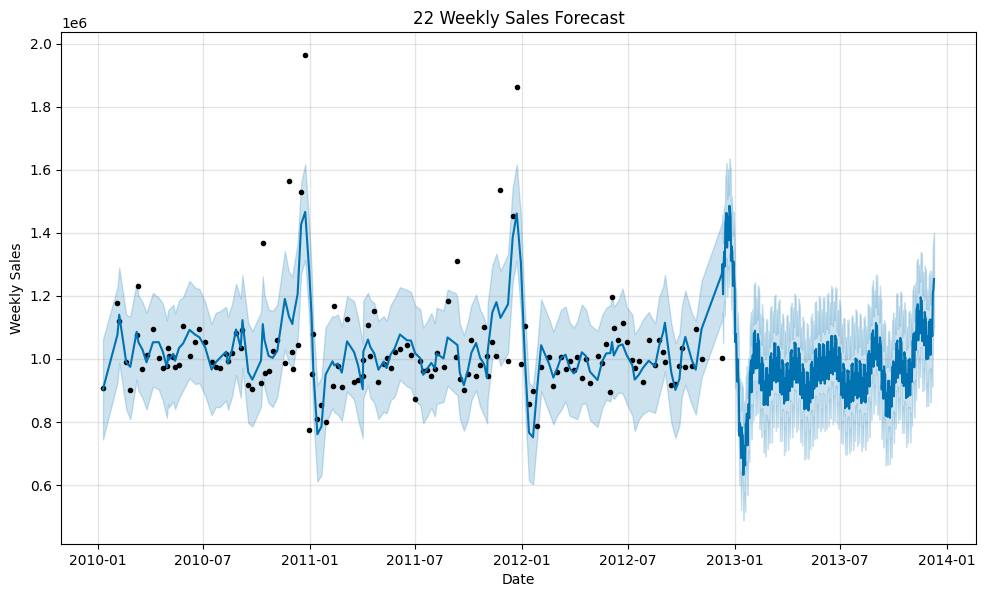

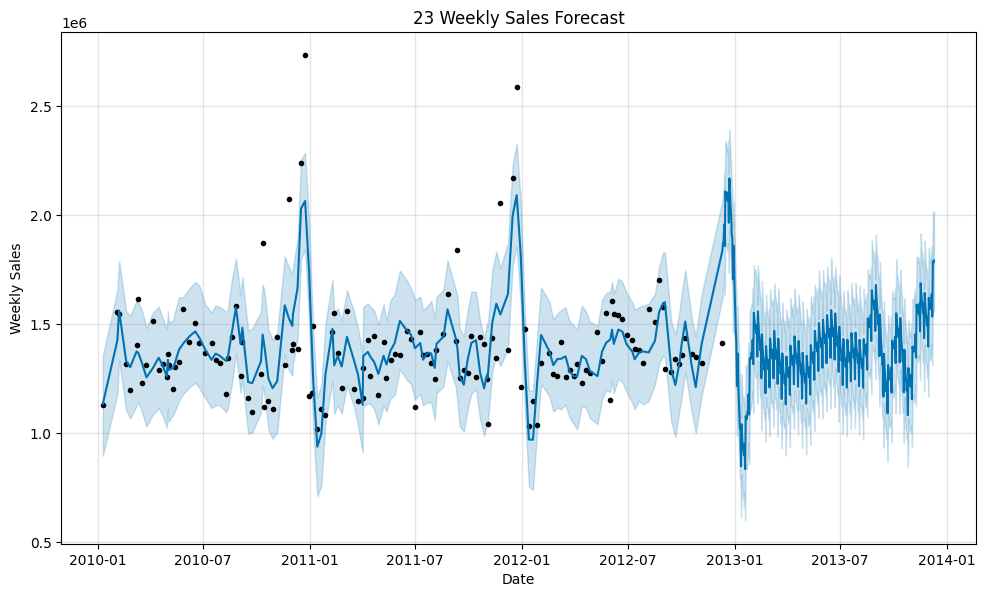

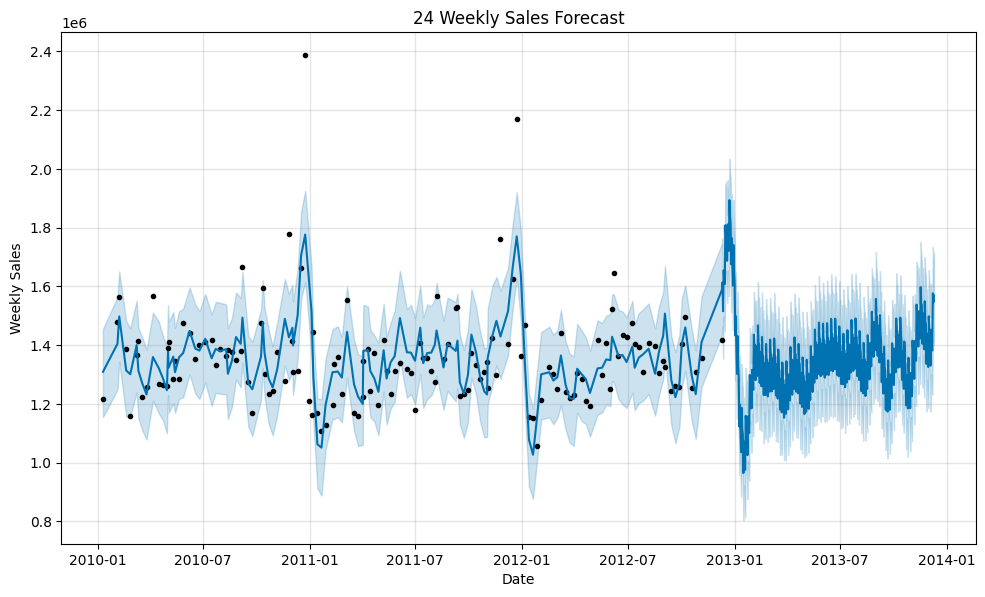

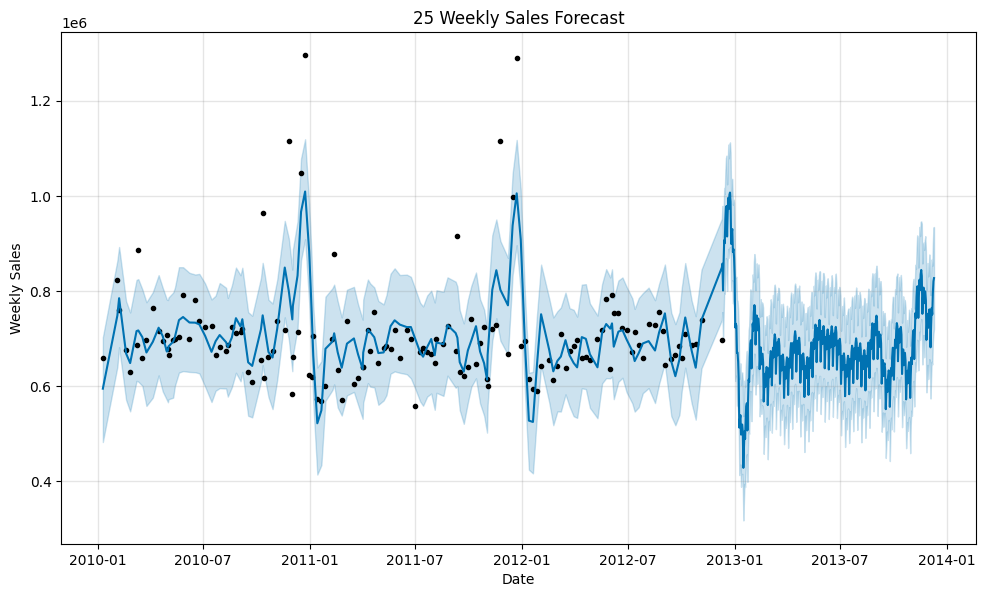

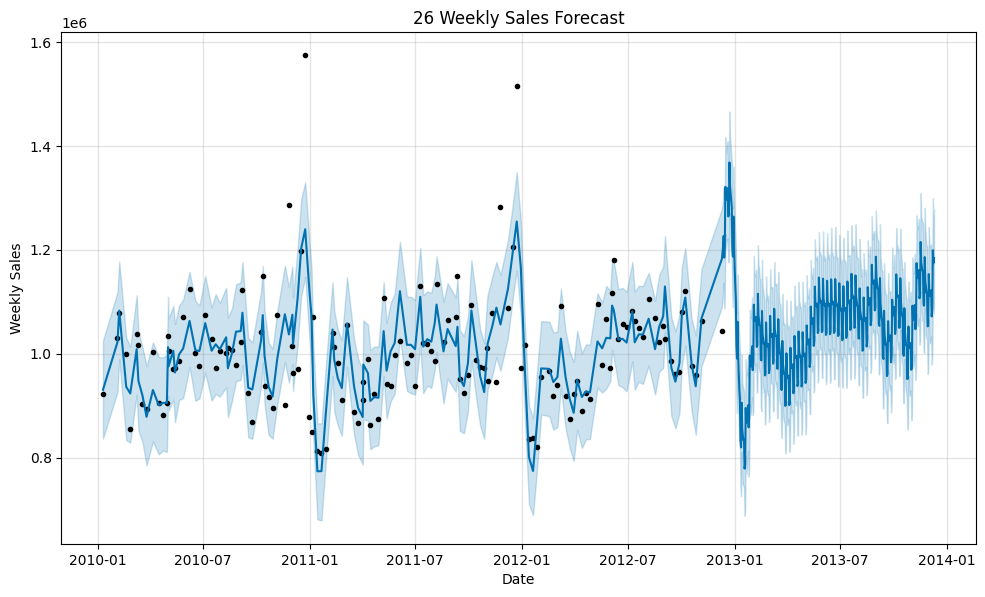

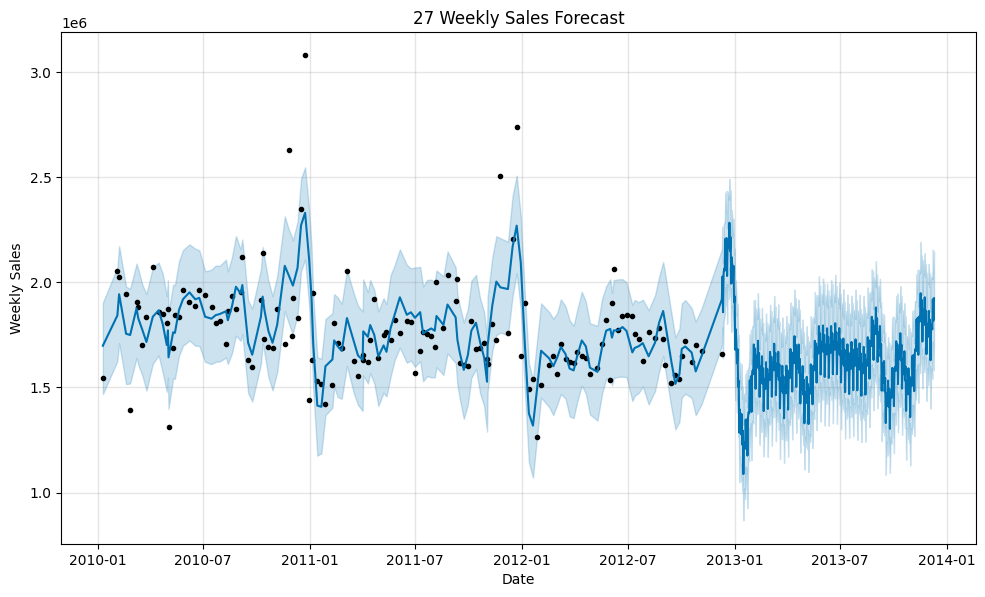

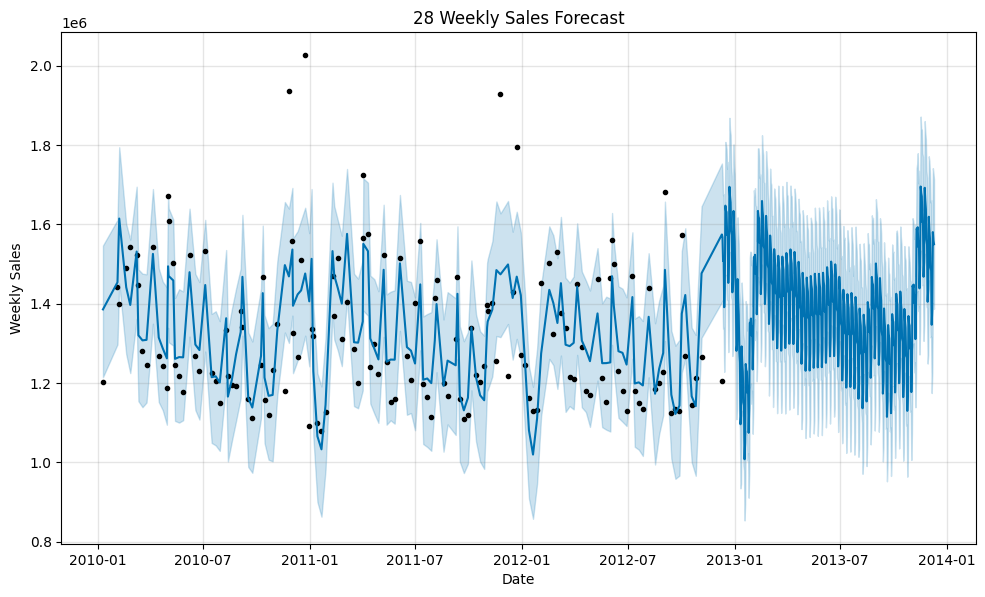

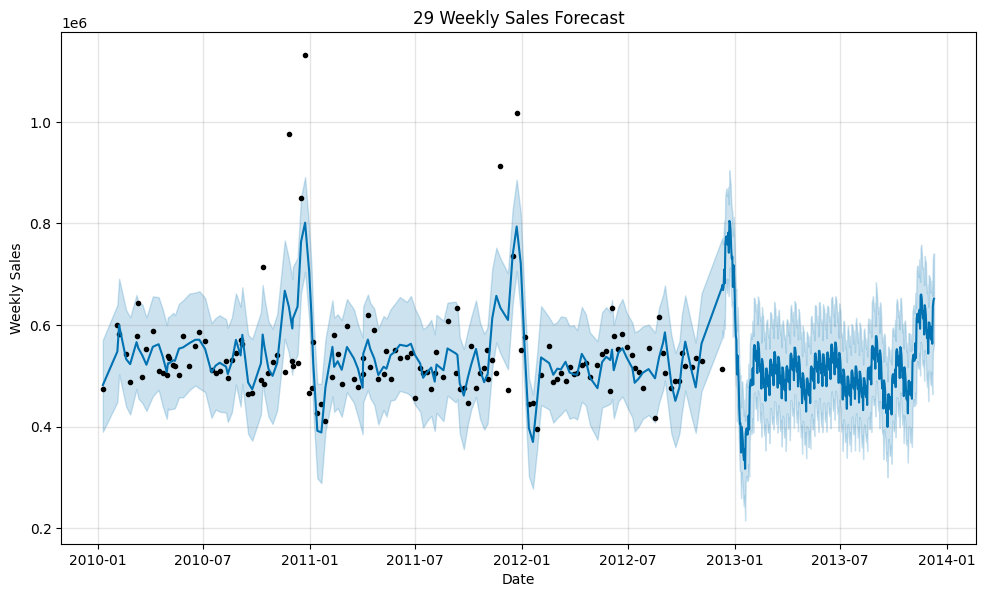

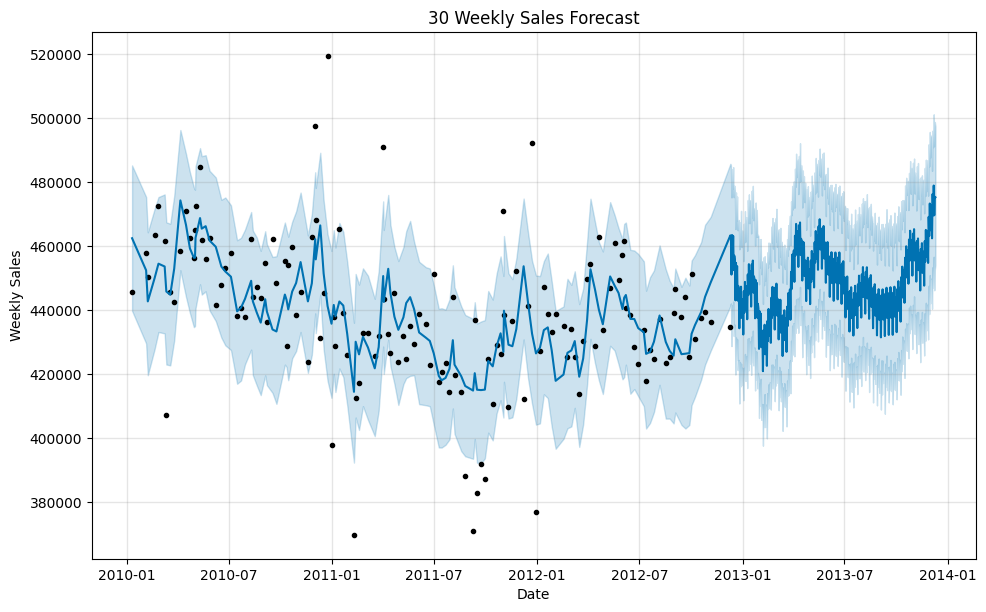

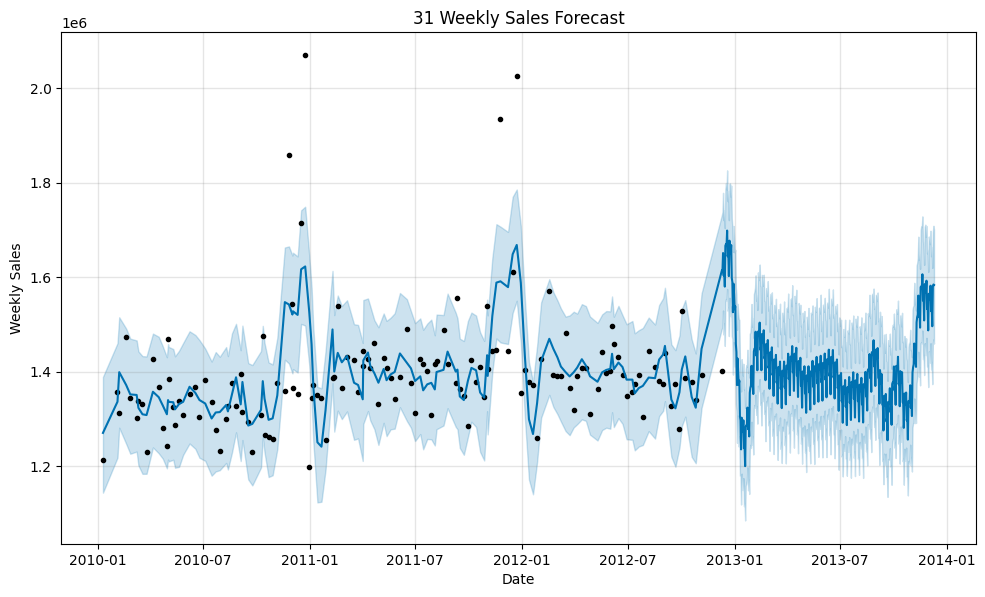

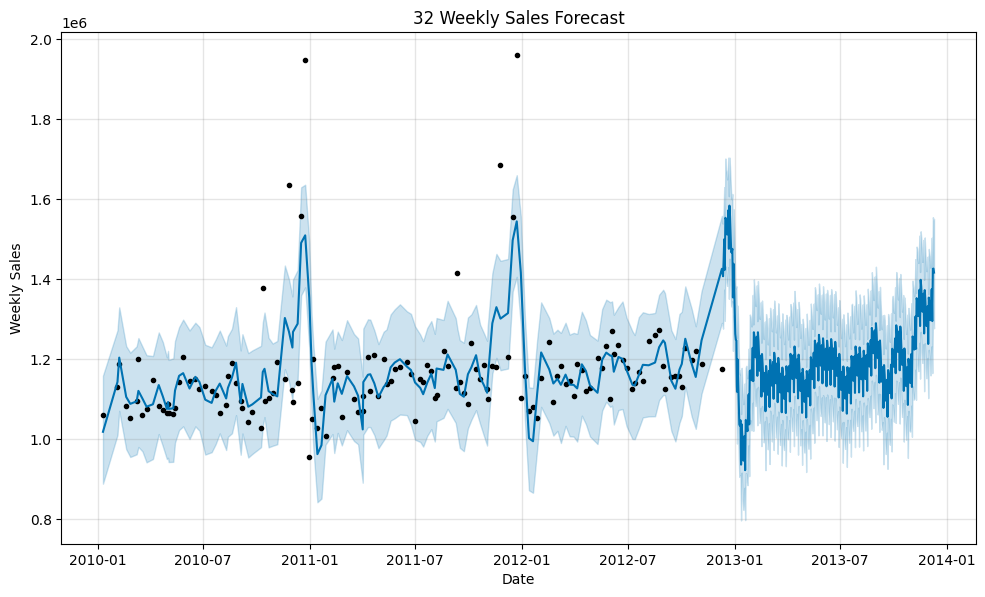

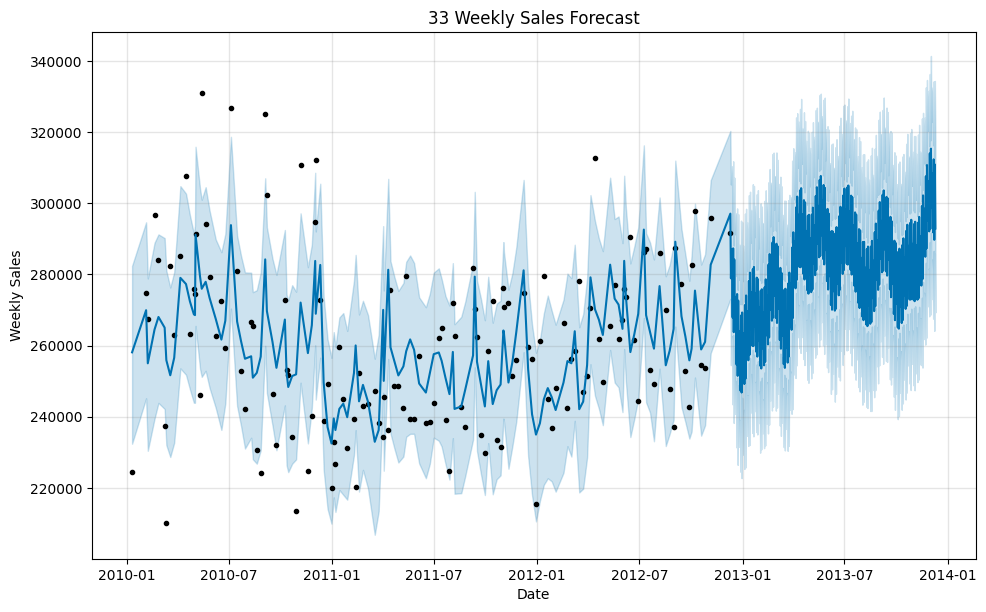

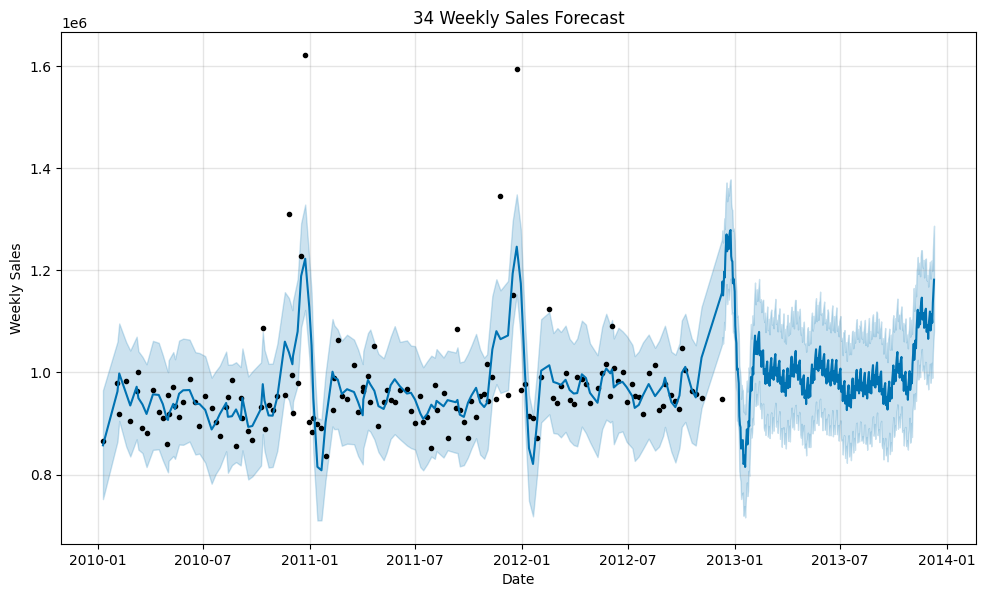

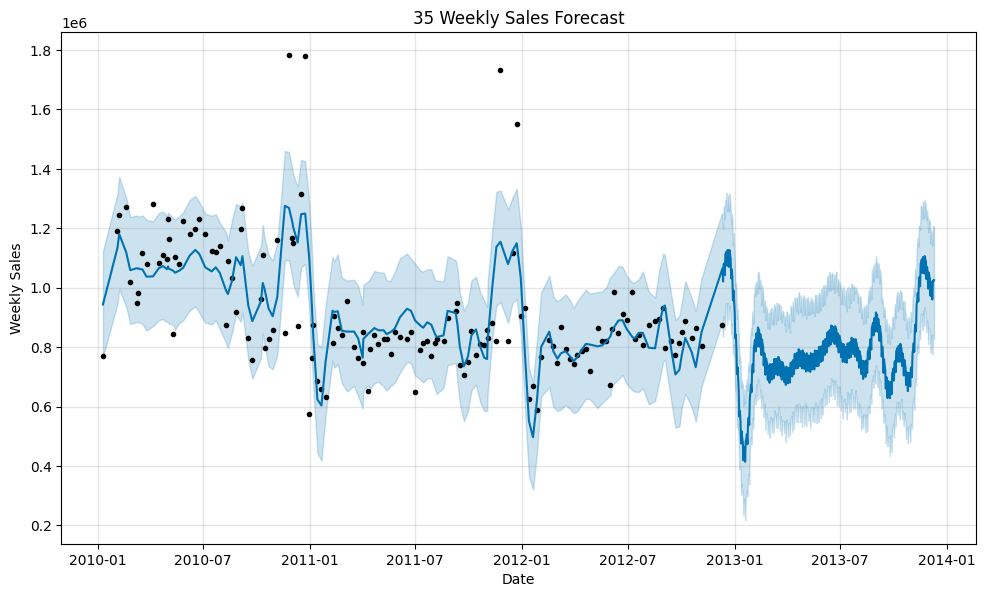

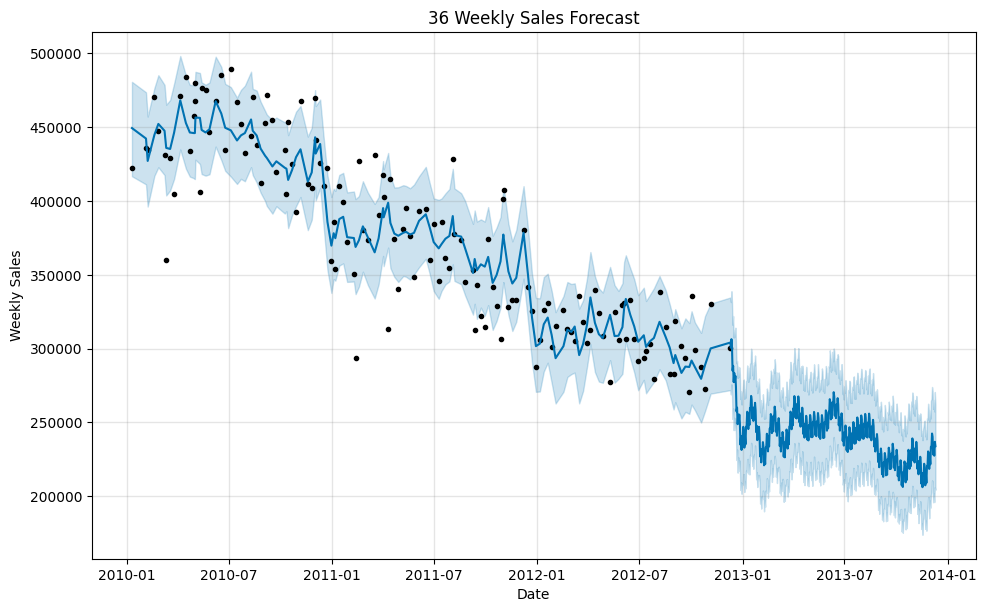

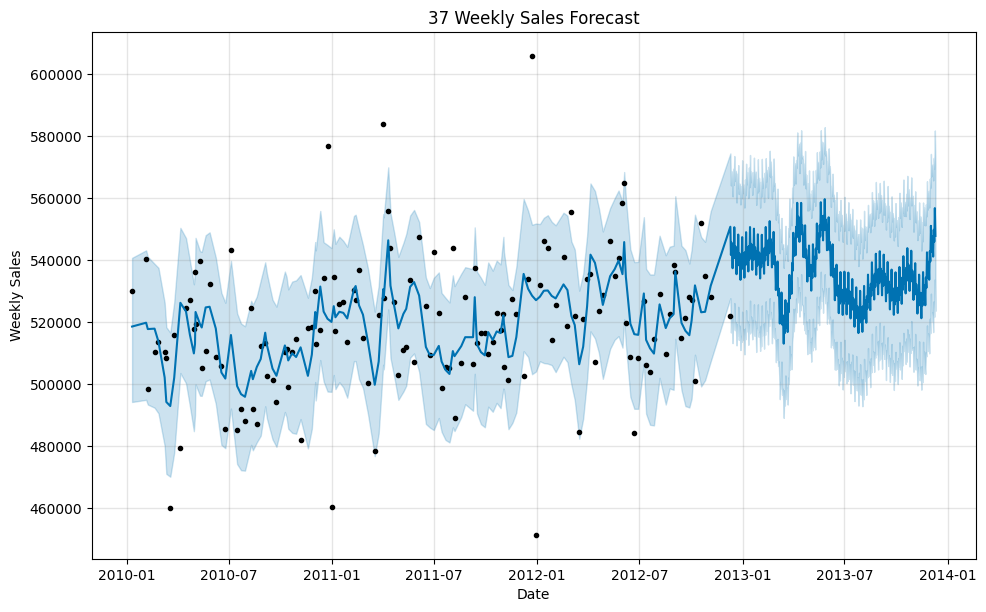

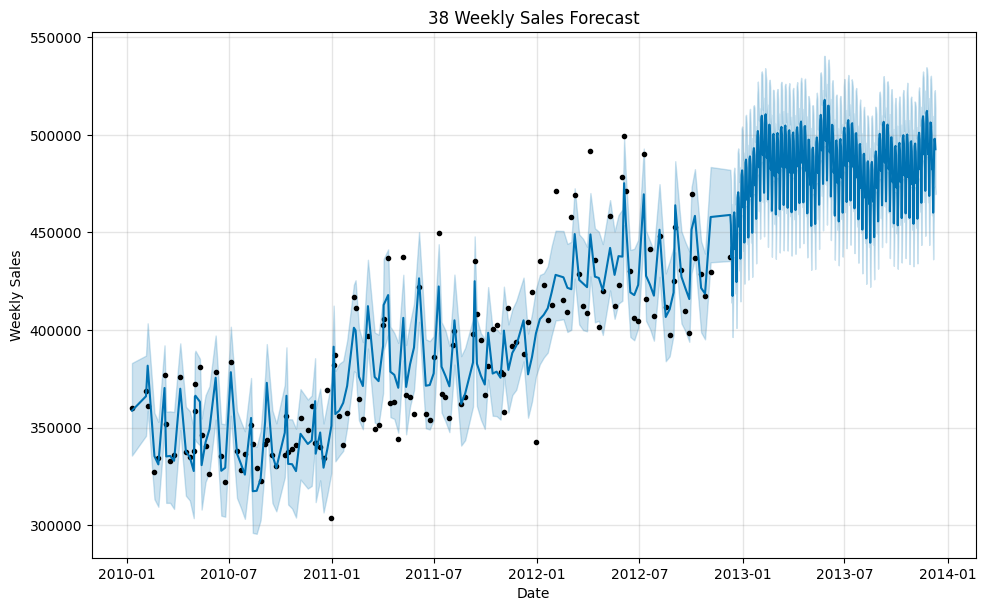

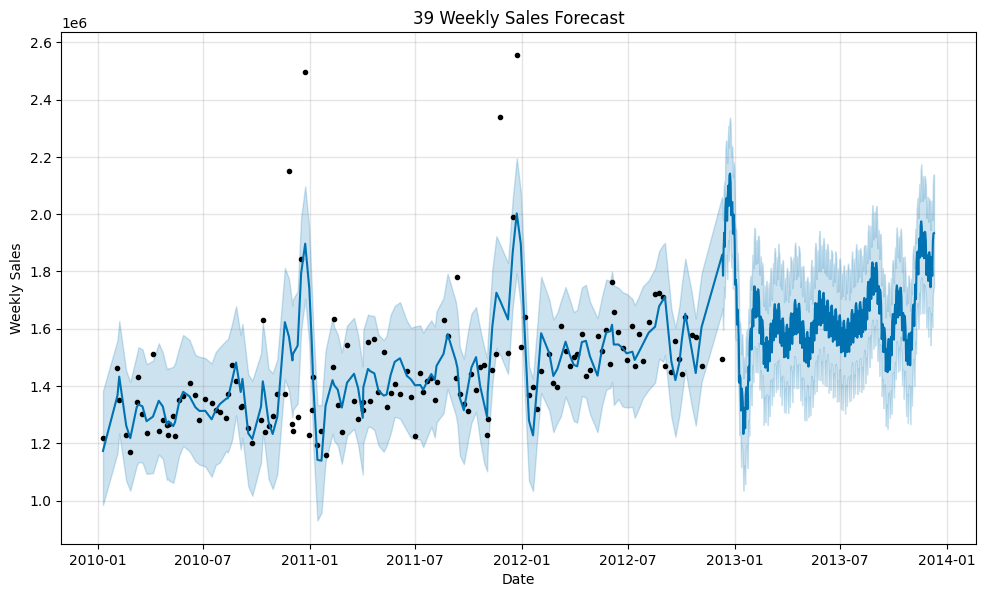

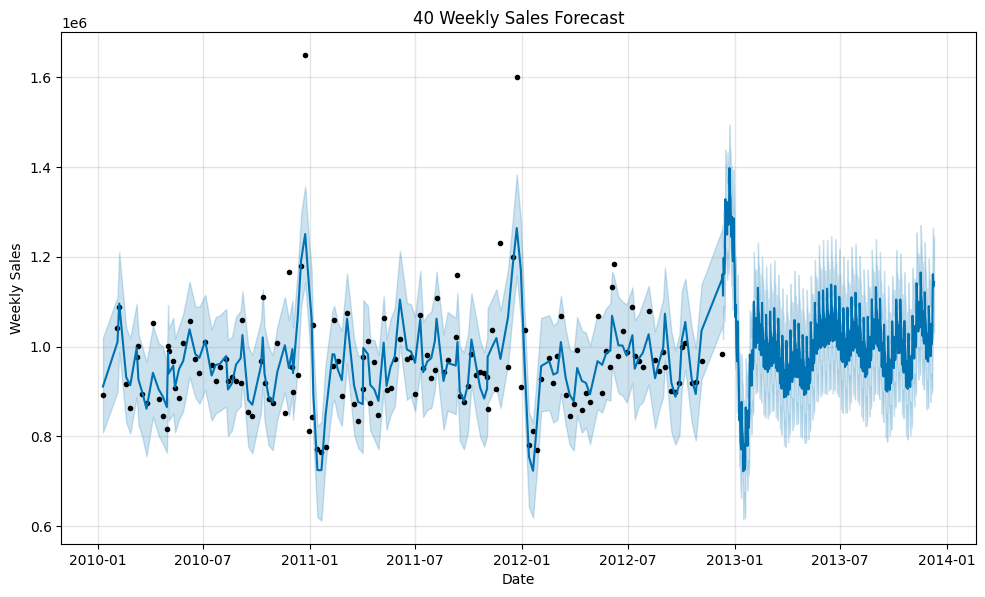

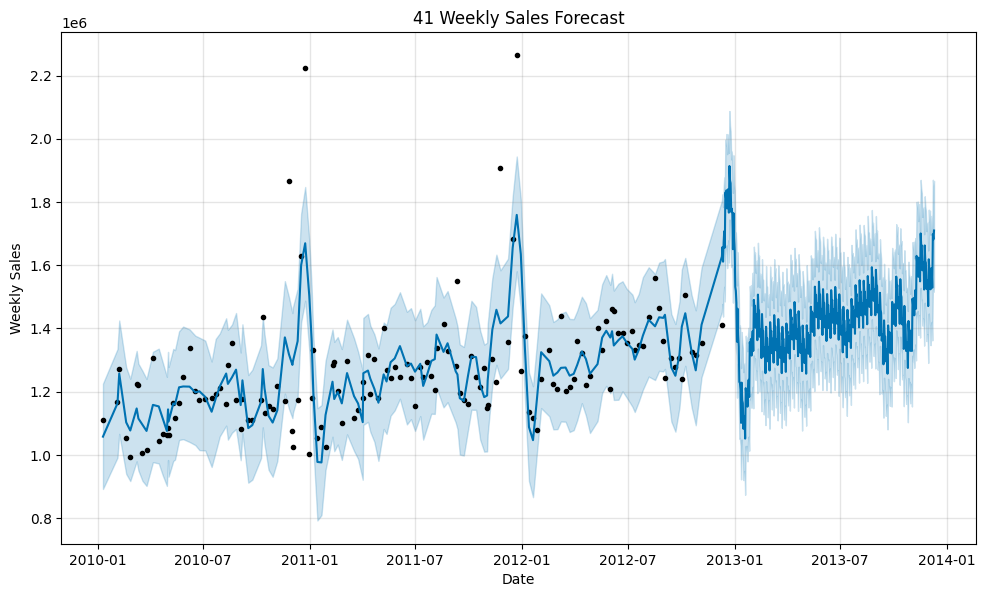

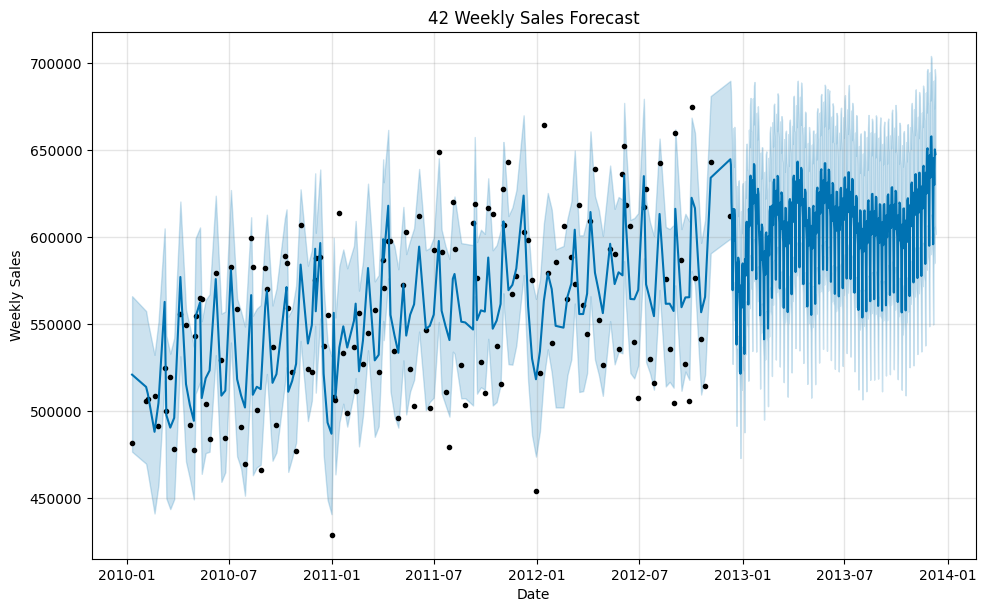

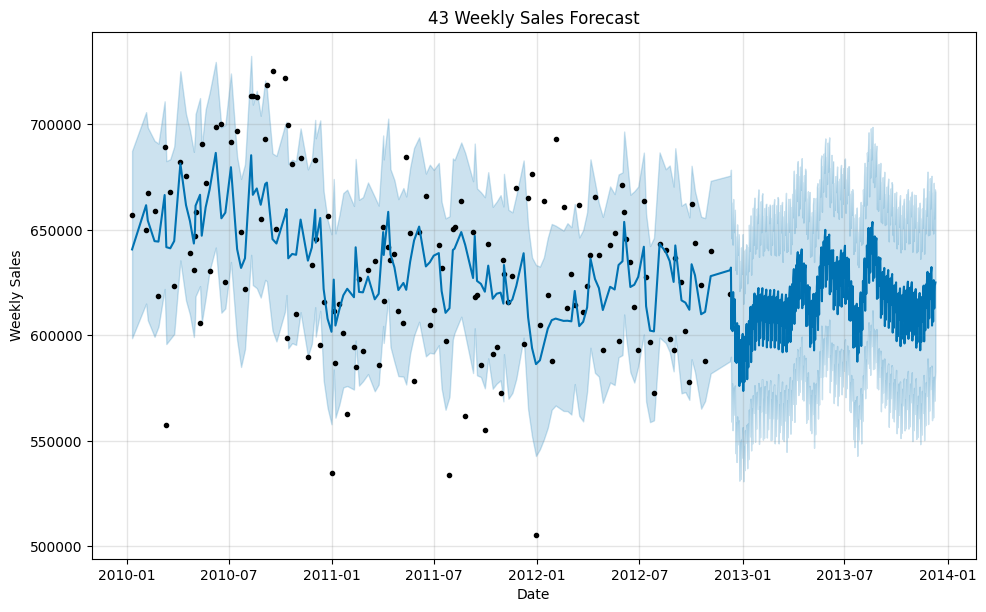

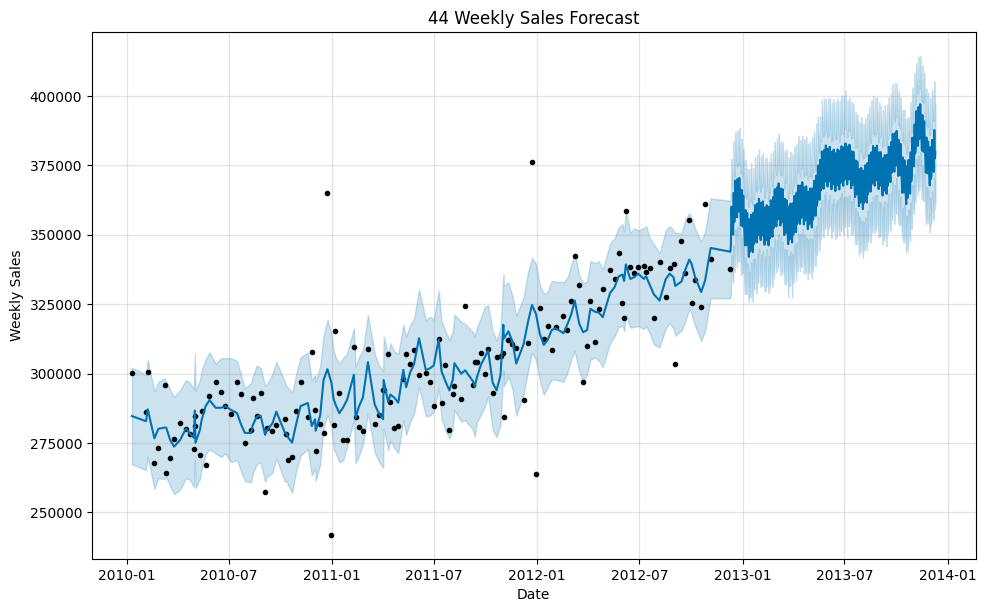

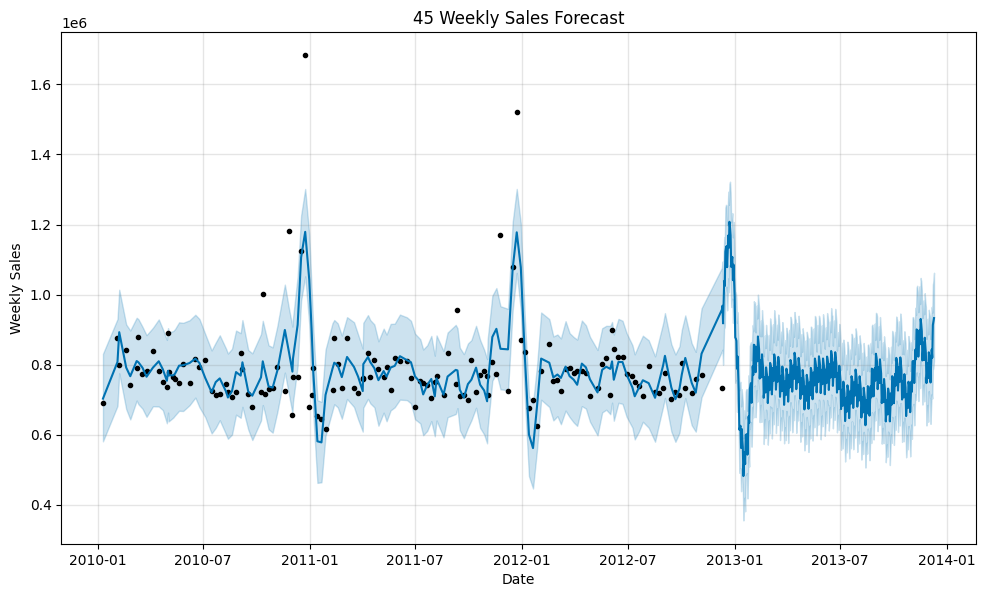

In [6]:
# Import and read the combined CSV file for all stores
application_df = pd.read_csv("walmart_cleaned.csv")

# Function to create and fit Prophet model for a given store
def forecast_store_sales(store_df, store_name):
    # Preprocess the dataset for Prophet
    prophet_df = store_df[['Date', 'Weekly_Sales']]
    prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(prophet_df)

    # Create DataFrame for future dates
    future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days) into the future

    # Make predictions
    forecast = model.predict(future_dates)

    # Visualize the forecast
    fig = model.plot(forecast)
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'{store_name} Weekly Sales Forecast')

    # Save the forecast plot to a file (optional)
    plt.savefig(f"{store_name}_forecast.png")

    # Return the forecast DataFrame
    return forecast

# Group data by store identifier (e.g., store) and create forecasts for each store
all_forecasts = []
for store_name, store_df in application_df.groupby('Store'):
    forecast = forecast_store_sales(store_df, store_name)
    all_forecasts.append((store_name, forecast))
